In [3]:
import akshare as ak
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为微软雅
plt.rcParams['font.sans-serif'] = ['SimHei']        # 字体设置
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False    # 负号显示问题

In [4]:
#获取最大涨幅板块
ind = ak.stock_board_industry_name_em()
bk = ind.sort_values('涨跌幅',ascending=False)['板块名称'][0]
bk

'中药'

In [5]:
#获取板块中涨停个股：

end =datetime.now().strftime('%Y%m%d')
stock_zt_pool_em_df = ak.stock_zt_pool_em(date=end)
stock_pool= stock_zt_pool_em_df[(stock_zt_pool_em_df['所属行业']==bk)]

In [6]:
stock_hot_rank_wc_df = ak.stock_hot_rank_wc(date=end)
stock_hot_rank_wc_df.rename(columns= {'股票代码':'代码'},inplace=True)
stock_hot_rank_wc_df = stock_hot_rank_wc_df[(stock_hot_rank_wc_df['代码']==stock_pool.iloc[0,1])]
stock_pool = pd.merge(stock_pool,stock_hot_rank_wc_df,on='代码')

002728


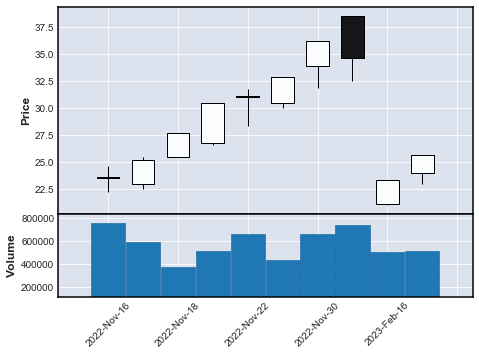

In [7]:
for i in range(len(stock_pool['代码'])):
    end =datetime.now().strftime('%Y%m%d')
    code= str(stock_pool['代码'].values[i])
    data =  ak.stock_zh_a_hist(symbol=code, period="daily", start_date="19900301", end_date=end, adjust="")
    data['日期'] = pd.to_datetime(data['日期'], format='%Y-%m-%d')
    data.rename(columns= {'日期':'date','开盘':'open','最高':'high','最低':'low','收盘':'close','成交量':'volume'},inplace=True)
    data['code'] = code
    data = data[['date','open','close','high','low','volume','code']]
    data['max'] = data['high'].rolling(20).max()
    data['volume_20m'] = data['volume'].rolling(20).mean()
    data['volume_5m'] = data['volume'].rolling(5).mean()
    data = data[(data['high']>=data['max'])&(data['volume']>data['volume_20m'])&(int((str(stock_pool['个股热度排名'].values).split('/'))[0][2:])<50)]
    data = data.set_index(data.date)
    data = data[['open','close','high','low','volume','code']]
    print(code)
    mpf.plot(data[-10:],type='candle',volume=True)